In [1]:
pwd

'C:\\Users\\enidi\\Desktop\\Python Projects'

In [ ]:
#import data
#EDA
#Data pre-processing - Data wrangling & cleaning
#Feature Engineering
#Train your model
#Test/Evaluate your model
#Tune model hyper-parameters
#Evaluate
#select the best model

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [5]:
lagos_houses = pd.read_csv('Lagos_House_Prices.csv')
lagos_houses.head()

,location,bed,bath,toilet,price,Property_Type,Parking_Space,Security,Electricity,Furnished,Security_Doors,CCTV,Pool,Gym,BQ
0,yaba,1,1,2,700000,Mini flat,0,0,0,0,0,0,0,0,0
1,yaba,1,1,2,700000,Mini flat,0,0,0,0,0,0,0,0,0
2,yaba,1,1,2,650000,Mini flat,0,0,0,0,0,0,0,0,0
3,yaba,1,1,1,450000,Mini flat,0,0,0,0,0,0,0,0,0
4,yaba,3,3,4,800000,Detached duplex,0,1,0,0,0,0,0,0,0


In [6]:
lagos_houses.shape

(5336, 15)

In [7]:
lagos_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5336 entries, 0 to 5335
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   location        5336 non-null   object
 1   bed             5336 non-null   int64 
 2   bath            5336 non-null   int64 
 3   toilet          5336 non-null   int64 
 4   price           5336 non-null   int64 
 5   Property_Type   5336 non-null   object
 6   Parking_Space   5336 non-null   int64 
 7   Security        5336 non-null   int64 
 8   Electricity     5336 non-null   int64 
 9   Furnished       5336 non-null   int64 
 10  Security_Doors  5336 non-null   int64 
 11  CCTV            5336 non-null   int64 
 12  Pool            5336 non-null   int64 
 13  Gym             5336 non-null   int64 
 14  BQ              5336 non-null   int64 
dtypes: int64(13), object(2)
memory usage: 625.4+ KB


In [9]:
lagos_houses.describe()

,bed,bath,toilet,price,Parking_Space,Security,Electricity,Furnished,Security_Doors,CCTV,Pool,Gym,BQ
count,5336.000000,5336.000000,5336.000000,5.336000e+03,5336.000000,5336.000000,5336.000000,5336.000000,5336.000000,5336.000000,5336.000000,5336.000000,5336.000000
mean,1.393178,1.447901,1.637181,6.455669e+05,0.122001,0.104573,0.023051,0.020240,0.000937,0.006372,0.005997,0.001312,0.013306
std,0.773157,0.793780,0.965145,4.693053e+05,0.327318,0.306031,0.150079,0.140833,0.030599,0.079576,0.077215,0.036199,0.114592
min,1.000000,1.000000,1.000000,1.500000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,3.500000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,5.000000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,2.000000,8.000000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,5.000000,5.000000,2.450000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

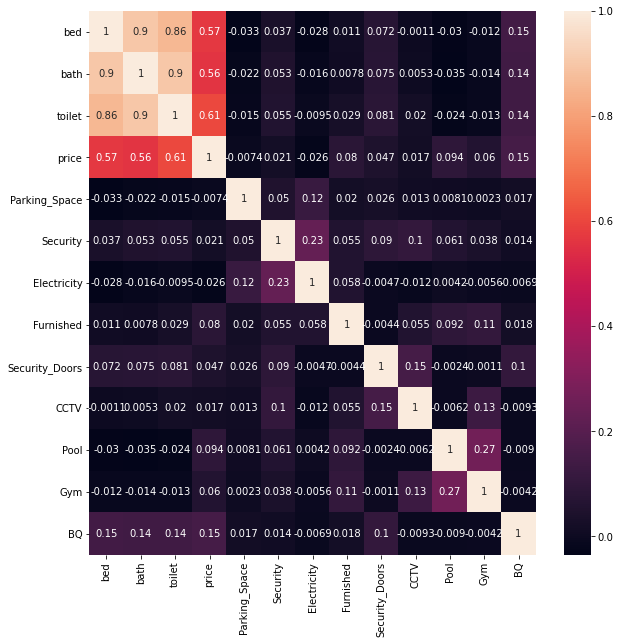

In [10]:
#check correlation

plt.figure(figsize=(10,10))
sns.heatmap(lagos_houses.corr(), annot = True)

In [11]:
lagos_houses.isnull().sum()

location          0
bed               0
bath              0
toilet            0
price             0
Property_Type     0
Parking_Space     0
Security          0
Electricity       0
Furnished         0
Security_Doors    0
CCTV              0
Pool              0
Gym               0
BQ                0
dtype: int64

In [15]:
lagos_houses.columns

Index(['location', 'bed', 'bath', 'toilet', 'price', 'Property_Type',
       'Parking_Space', 'Security', 'Electricity', 'Furnished',
       'Security_Doors', 'CCTV', 'Pool', 'Gym', 'BQ'],
      dtype='object')

In [16]:
#select the column you want to predict- price 
y = lagos_houses['price']

In [17]:
y.head()

0    700000
1    700000
2    650000
3    450000
4    800000
Name: price, dtype: int64

In [20]:
feature_columns = ['bed', 'bath', 'toilet','Parking_Space', 'Security', 'Electricity', 'Furnished', 
                   'Security_Doors', 'CCTV', 'Pool', 'Gym', 'BQ']

feature_columns

['bed',
 'bath',
 'toilet',
 'Parking_Space',
 'Security',
 'Electricity',
 'Furnished',
 'Security_Doors',
 'CCTV',
 'Pool',
 'Gym',
 'BQ']

In [21]:
x = lagos_houses[feature_columns]
x.head()

,bed,bath,toilet,Parking_Space,Security,Electricity,Furnished,Security_Doors,CCTV,Pool,Gym,BQ
0,1,1,2,0,0,0,0,0,0,0,0,0
1,1,1,2,0,0,0,0,0,0,0,0,0
2,1,1,2,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,0,0,0
4,3,3,4,0,1,0,0,0,0,0,0,0


In [22]:
#assign your training data to be x

#x = lagos_houses.drop('price', axis = 1)
#x.head()

In [23]:
# let's build our first model
from sklearn.tree import DecisionTreeRegressor

In [24]:
# to initialize or create an instance of your model

lagos_model = DecisionTreeRegressor(random_state = 42)

In [25]:
#fit/train the model to your training data

lagos_model.fit(x,y)

DecisionTreeRegressor(random_state=42)

In [27]:
#make prediction on the house prices
prediction = lagos_model.predict(x)

prediction

array([ 714471.74447174,  714471.74447174,  714471.74447174, ...,
       1722222.22222222,  714471.74447174, 1800000.        ])

In [ ]:
#compare the actual price with the predicted price


In [31]:
# to evaluate our models 
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt
from math import sqrt
RMSE = sqrt(MSE(y, prediction))

In [33]:
print ('MAE =', MAE(y,prediction))
print ('MSE =', MSE(y,prediction))
print ('RMSE =', RMSE)

MAE = 239587.33686843375
MSE = 121988805608.65668
RMSE = 349268.9588392542


In [ ]:
#MAE refers to the average differece between an actual price and the predicted price.
# it means that the average difference between my actual house price and predicted is #240,000

In [ ]:
# explained variance score
metrics.explained_variance_score(y_test, prediction)

In [ ]:
from math import sqrt
RMSE = sqrt(MSE(y, prediction))

In [ ]:
print ('RMSE', RMSE)

In [ ]:
lm.coef_

In [ ]:
prediction = lm.predict(x_test)

In [ ]:
prediction

In [ ]:
plt.scatter(y_test, prediction)
plt.xlabel('Y Test(True Values)')
plt.ylabel('Predicted Values')